<a href="https://colab.research.google.com/github/MarkPesano/Phys-250/blob/main/Lab_06_with_Planet_Jupiter_Involved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Planetary Motion

*written by Rose Finn*

*adapted from Giordano and Nakanishi, Chapter 4*


The goal of this lab is to model the motion of a planet orbiting a star.  We will start by modeling the Earth's motion around the Sun, but we write the code in such a way that it can be easily adapted to model other 2-body systems.

* In class, we reviewed the units that we will use in the lab, namely our distances will be in Astronomical Units (AU, where 1 AU is the mean distance between the Earth and Sun), and our time will be measured in years.

* We will assume that the Sun is fixed at a central position, and the Earth revolves around it.

In [1]:
# import numpy and pyplot
import numpy as np
from matplotlib import pyplot as plt


# Write the initialize function

Write a function called **initialize** that does the following.
* Input
  * initial x position, $x_0$
  * initial y position, $y_0$
  * initial x velocity, $v_{0x}$
  * initial y velocity, $v_{0y}$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, x, y, vx, vy arrays using `np.zeros`
  * set the first value of the x array to $x_0$
  * set the first value of the y array to $y_0$
  * set the first value of the vx array to $v_{0x}$
  * set the first value of the vy array to $v_{0y}$

* The function should return the following arrays *in this order*:
  * time array
  * x position array
  * y position array
  * x velocity array
  * y velocity array

In [6]:
# write your initialize function here
def initialize(x0,y0,v0x,v0y,xj0,yj0,v0xj,v0yj,tmax,dt):
  nsteps = int(tmax/dt)
  time = np.zeros(nsteps)
  x = np.zeros(nsteps)
  y = np.zeros(nsteps)
  xvel = np.zeros(nsteps)
  yvel = np.zeros(nsteps)
  xj = np.zeros(nsteps)
  yj = np.zeros(nsteps)
  xjvel = np.zeros(nsteps)
  yjvel = np.zeros(nsteps)
  x[0] = x0
  y[0] = y0
  xj[0] = xj0
  yj[0] = yj0
  xvel[0] = v0x
  yvel[0] = v0y
  xjvel[0] = v0xj
  yjvel[0] = v0yj

  return time, x, y, xvel,yvel , xj, yj , xjvel, yjvel




# Distance Function

Write a function called **distance** to calculate the distance between the Earth and Sun given the Earth's x and y positions.  We assume throughout that the Sun is located at $x=0, y=0$, and that the Sun does not move.

Write a function called **distance** that does the following.
* Input
  * x position, $x$
  * y position, $y$

* The function should:
  *  calculate the distance between the Earth and Sun
  ```
  r = np.sqrt(x**2 + y**2)
  ```


* The function should return :
  * the distance $r$

In [5]:
# write your distance function here
def distance(x,y):
  r = np.sqrt(x**2 + y**2)
  return r



# Calculate function

Write a function called **calculate** that does the following.
* Input
  * time array, $time$
  * x position, $x$
  * y position, $y$
  * x velocity, $v_{x}$
  * y velocity, $v_{y}$
  * time step, $dt$
  * optional argument **cromer** that has a default value of ```True```

* The function should:
  * calculate vx, vy, and time
  * if ```cromer=True```, use the Euler-Cromer method to calculate x and y
  * if ```cromer=False```, use the Euler method to calculate x and y

* The function should return the following arrays *in this order*:
  * time array
  * $x$ position array
  * $y$ position array
  * $v_{x}$ velocity array
  * $v_{y}$ velocity array

In [97]:

# write your calculate function
def calculate(time,x,y,vx,vy,xj,yj,vxj,vyj,mj,dt, cromer = True):
  #Mj = (1.9*(10**27))*1000
  Me = 6.0 * (10**24)
  Ms = 10.0 * (10**30)
  for i in range(1,len(vx)):
     rse = distance(x[i-1],y[i-1])
     rsj = distance(xj[i-1],yj[i-1])
     rej = distance(xj[i-1]-x[i-1],yj[i-1]-y[i-1])
     vx[i] = vx[i-1]-((4*np.pi**2)/(rse**3))*x[i-1]*dt - ((4*np.pi**2)*((mj)/(Ms))/(rej**3))*(x[i-1]-xj[i-1])*dt
     vy[i] = vy[i-1]-((4*np.pi**2)/(rse**3))*y[i-1]*dt - ((4*np.pi**2)*((mj)/(Ms))/(rej**3))*(y[i-1]-yj[i-1])*dt
     vxj[i] = vxj[i-1]-((4*np.pi**2)/(rsj**3))*xj[i-1]*dt + ((4*np.pi**2)*((Me)/(Ms))/(rej**3))*(xj[i-1]-x[i-1])*dt
     vyj[i] = vyj[i-1]-((4*np.pi**2)/(rsj**3))*yj[i-1]*dt + ((4*np.pi**2)*((Me)/(Ms))/(rej**3))*(yj[i-1]-y[i-1])*dt
     time[i] = time[i-1]+dt
     if cromer == True :
      x[i] = x[i-1]+vx[i]*dt
      y[i] = y[i-1]+vy[i]*dt
      xj[i] = xj[i-1]+vxj[i]*dt
      yj[i] = yj[i-1]+vyj[i]*dt
     elif cromer == False :
        x[i] = x[i-1]+vx[i-1]*dt
        y[i] = y[i-1]+vy[i-1]*dt
        xj[i] = xj[i-1]+vxj[i-1]*dt
        yj[i] = yj[i-1]+vyj[i-1]*dt
  return time, x, y, vx,vy , xj, yj, vxj, vyj


# Function to make plots

Write a function called **make_plots** that does the following.
* Input
  * time array, $time$
  * x position, $x$
  * y position, $y$
  * x velocity, $v_{x}$
  * y velocity, $v_{y}$


* The function should:
  * set the figure size to (15,4)
  ```python
  plt.figure(figsize=(15,4))
  plt.subplots_adjust(wspace=.35)
  ```
  * use the ```plt.subplot``` command to make a plot with one row and three columns.
  * plot y vs x in the first panel using scatter, and color the points using the time array.  The following code snippet should help.  Note: we are using ```plt.axis('equal')``` so that the x and y axes are on the same scale.  This will make a circle look like a circle.
  ```
  plt.scatter(x,y,c=time,s=10)
  plt.colorbar(label="Time (yr)")
  plt.axis('equal')
  ```
  * plot x, y, and the radius (```r = np.sqrt(x**2+y**2) ```) vs time in the second plot.
  * plot vx, vy, and the magnitude of the total velocity  (```v = np.sqrt(vx**2+vy**2) ```) vs time in the third plot.
  * be sure to label the axes in each plot, and use the correct units.
  * add a legend to the second and third panels.

* The function does not return anything.

In [98]:
# write your make_plots function here
def make_plots(time, x,y,vx,vy,xj,yj,vxj,vyj):
  rj = np.zeros(len(np.sqrt(x**2+y**2)))+5.2
  plt.figure(figsize=(20,5))
  plt.subplots_adjust(wspace=.35)



  plt.subplot(1,2,1)
  plt.scatter(x,y,c=time,s=10)
  plt.scatter(xj,yj,c=time,s=10)
  plt.colorbar(label="Time (yr)")
  plt.axis('equal')
  plt.title('x and y Position for Earth and Jupiter')
  plt.legend(fontsize = 'small')


  plt.subplot(2,4,3)
  r = np.sqrt(x**2+y**2)
  plt.plot(time,x, label = 'X position vs. time')
  plt.plot(time,y, label = 'Y position vs. time')
  plt.plot(time,r, label = 'Radius position vs. time')
  plt.xlabel("Time")
  plt.ylabel("Position")
  plt.title('x and y Position vs. Time for Earth')
  plt.legend(fontsize = 'small')

  plt.subplot(2,4,7)
  r = np.sqrt(x**2+y**2)
  plt.plot(time,xj, label = 'X position vs. time')
  plt.plot(time,yj, label = 'Y position vs. time')
  plt.plot(time,rj, label = 'Radius position vs. time')
  plt.xlabel("Time")
  plt.ylabel("Position")
  plt.title('x and y Position vs. Time for Jupiter')
  plt.legend(fontsize = 'small')

  plt.subplot(2,4,4)
  v = np.sqrt(vx**2+vy**2)
  plt.plot(time,vx, label = 'Velocity in x direction vs. time')
  plt.plot(time,vy, label = 'Velocity in y direction vs. time')
  plt.plot(time,v, label = 'Magnitude of Velocity vs. time')
  plt.xlabel("Time")
  plt.ylabel("Velocity")
  plt.title('vx and vy vs. Time for Earth')
  plt.legend(fontsize = 'small')

  plt.subplot(2,4,8)
  v = np.sqrt(vx**2+vy**2)
  plt.plot(time,vxj, label = 'Velocity in x direction vs. time')
  plt.plot(time,vyj, label = 'Velocity in y direction vs. time')
  plt.plot(time,np.sqrt(vxj**2+vyj**2), label = 'Magnitude of Velocity vs. time')
  plt.xlabel("Time")
  plt.ylabel("Velocity")
  plt.title('vx and vy vs. Time for Jupiter')
  plt.legend(fontsize = 'small')



# main function

Write a function called **main** that does the following.  Note, this is different from how we have structured the main program in the past, but it will allow us to modify the parameters of the model easily.

* Input
  * initial x position, $x_0$
  * initial y position, $y_0$
  * initial x velocity, $v_{0x}$
  * initial y velocity, $v_{0y}$
  * total time, $tmax$
  * time step, $dt$
  * optional argument **cromer** that has a default value of ```True```

* The function should:
  * call **initialize**
  * call **calculate**
  * call **make_plots**


* The function should return the following arrays *in this order*:
  * time array
  * $x$ position array
  * $y$ position array
  * $v_{x}$ velocity array
  * $v_{y}$ velocity array

In [99]:
# write your main function here
def main(x0,y0,v0x,v0y,xj0,yj0,v0xj,v0yj,tmax,mj,dt,cromer = True):
  '''Calling initialize function'''
  timeArr , xArr, yArr,vxArr,vyArr , xjArr, yjArr, vxjArr, vyjArr = initialize(x0,y0,v0x,v0y,xj0,yj0,v0xj,v0yj,tmax,dt)
  ''' Calling Calculate Function '''
  t, x , y , vx , vy,xj,yj,vxj,vyj = calculate(timeArr,xArr,yArr,vxArr,vyArr,xjArr,yjArr,vxjArr,vyjArr,mj,dt, cromer = cromer)
  ''' Calling the make_plots function'''
  make_plots(t, x,y,vx,vy, xj,yj,vxj,vyj)

  return t, x, y, vx, vy , xj,yj,vxj,vyj



# Run the program

(10 points)

In the cell below:

* define the initial values of x0, y0, v0x, and v0y
* define the value of tmax and dt
* then call main


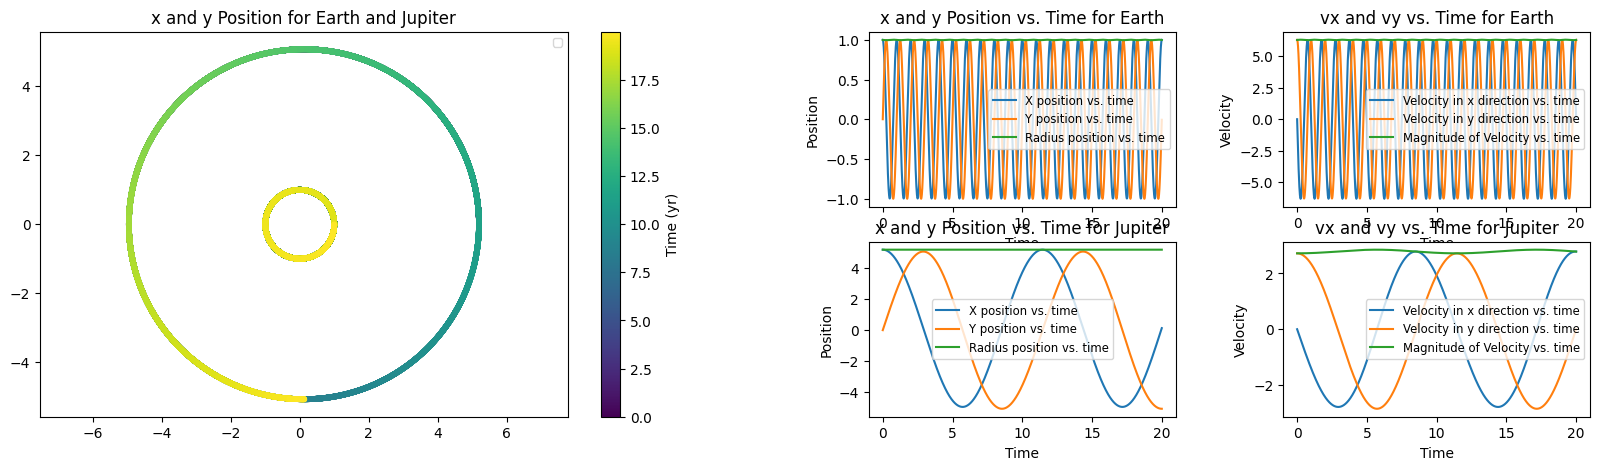

In [100]:
x0 = 1 # initial x position in AU
y0 = 0 # initial y position in AU
v0x =0  # initial x velocity in AU/yr
v0y = 2*np.pi # initial y velocity in AU/yr
xj0 = 5.2 # orbital radius
yj0 = 0
v0xj = 0
v0yj = 2*np.pi*(5.2/12) # 2 pi *au/T
tmax = 20  # time in years
dt = .001# time step in years
mj = (1.9*(10**27))

# call main
t = main(x0,y0,v0x,v0y,xj0,yj0,v0xj,v0yj,tmax,mj,dt,cromer = True)

### Question 1

Describe the Earth's orbit.  How does the radius change with time?  How does the magnitude of the velocity or speed change with time? The radius does not change with time, on both the position and velocity graphs, the radius and magnitude of velocity stay the constant.


# Modifying the initial velocity

(10 points)

What if the Earth's velocity suddenly increased?  Would its orbit change?  If so, how?

This is a question that is challenging to solve analytically, but we can easily solve it numerically.

In the cell below, increase the initial velocity by one, and then rerun main.  

**Be sure to adjust `tmax` so that the planet completes at least one full orbit.**



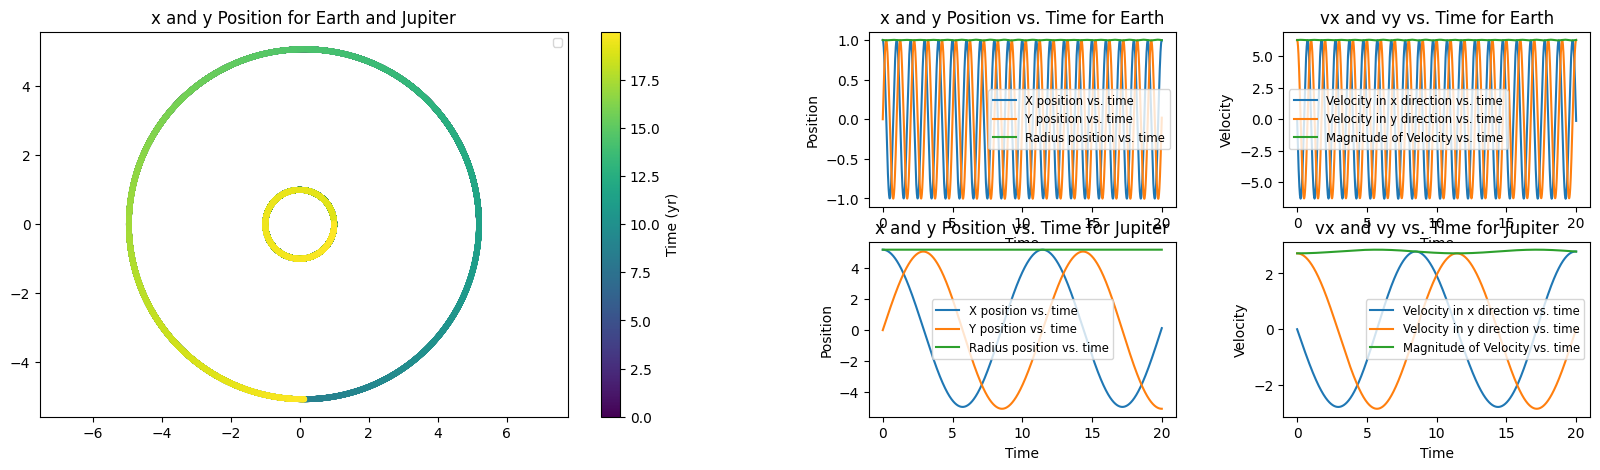

In [101]:
# write your code here to increase the initial velocity by one

mj_1 = (1.9*(10**27))*10

# call main
main_t = main(x0,y0,v0x,v0y,xj0,yj0,v0xj,v0yj,tmax, mj_1,dt, cromer = True)

Repeat this again, but this time decrease the initial velocity by one:
```python
v0y = 2*np.pi - 1
```

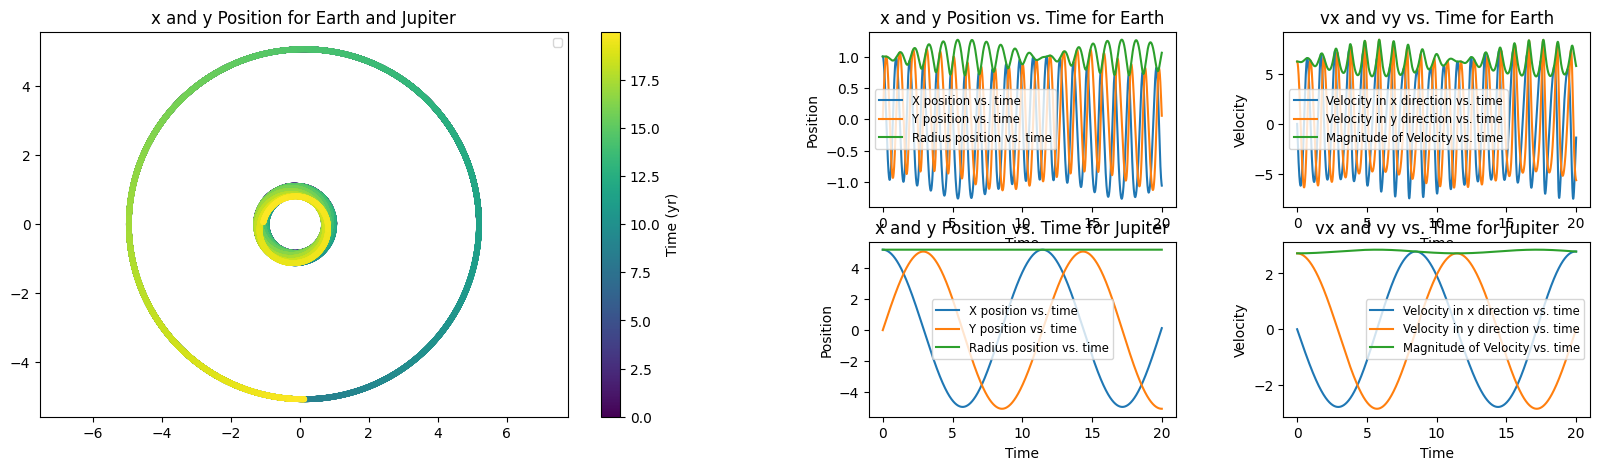

In [102]:

mj_2 = (1.9e27)*1000

# call main
main_t2 = main(x0,y0,v0x,v0y,xj0,yj0,v0xj,v0yj,tmax,mj_2,dt,cromer = True)

### Question 2

* Describe what happens to the Earth's orbit when you increase the initial velocity.  Describe how the distance between the Earth and Sun changes with time.  Describe how the Earth's speed changes with time. What is the relationship between speed and distance from the Sun?

The orbit becomes irregular, the distance between the Earth and the sun moves between 1 and 3 au is position. The Earth's velocity changes chaotically as time changes. Whenever the position increases the speed decreases.

* Describe what happens to the Earth's orbit when you decrease the initial velocity. Describe how the distance between the Earth and Sun changes with time.  Describe how the Earth's speed changes with time. What is the relationship between speed and distance from the Sun?

The distance between the Earth and the sun start close to the value of 1 au until the values get exponentially bigger. The Earths speed changes more rapidly as time is changing. As the radius gets larger, the velocity values become larger.

* Kepler's 1st Law states that the planets orbit the Sun in elliptical orbits, with the Sun at one of the foci.  Are your modeling results consistent with Kepler's 1st Law?  What determines if a planet or other solar system body orbits in a circular or elliptical orbit?

When we changed out velocity values, the planet did not orbit elliptical, most of the orbit was close to an eliptical path, but slowly steered away from continuing the path.

* Kepler's 2nd Law states that planets sweep out equal area in equal time.  This means that planets travel faster when they are closer to the Sun, and slower when they are further from the Sun.  Are your modeling results consistent with Kepler's 2nd Law?

The positiong graph graphs the radius as time changes and the velocity graph is the inverserve. When velocity is at a greater f=value, the radius is at a small value. I would say this modeled Kepler's 2nd Law

# Stability of the Orbital Model

(5 points)

* In the cells below, rerun your model, but increase the total time to 2, 3, and 4 years.  Use the initial velocity of ```v0y = 2 np.pi```.


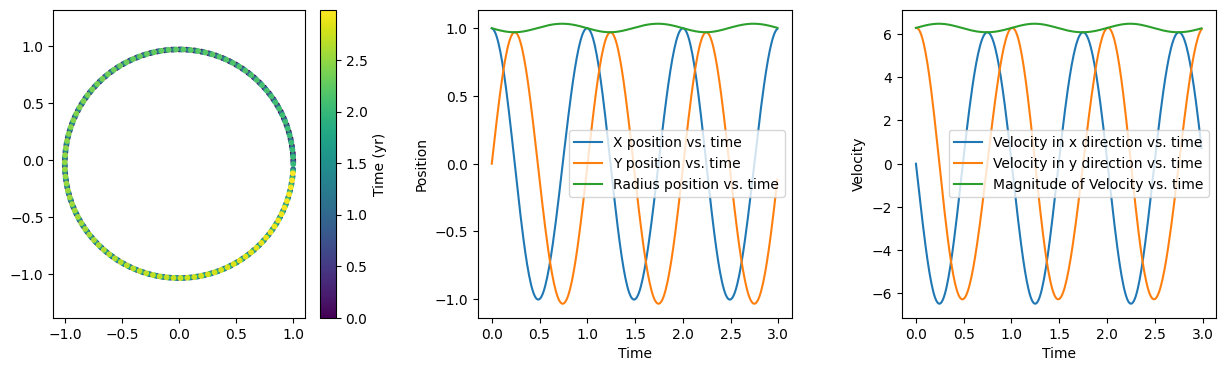

In [ ]:
x0 = 1 # initial x position in AU
y0 = 0 # initial y position in AU
v0x = 0 # initial x velocity in AU/yr
v0y = 2*np.pi # initial y velocity in AU/yr
tmax = 3# time in years
dt = 0.01# time step in years


# call main
main = main(x0,y0,v0x,v0y,tmax,dt, True)

### Question 3

* Does the orbit stay stable?  If the orbit stays stable, then the points from multiple orbits will fall on top of each other.

Yes the orbit stays stable, the motion of the orbit overlapped with the different times.

# Euler vs Euler-Cromer Method

(5 points)

* In the cell below, rerun the initial model, but use the Euler method instead of the Euler-Cromer method.

* set tmax to 4 years to see if and how the orbit changes with time.



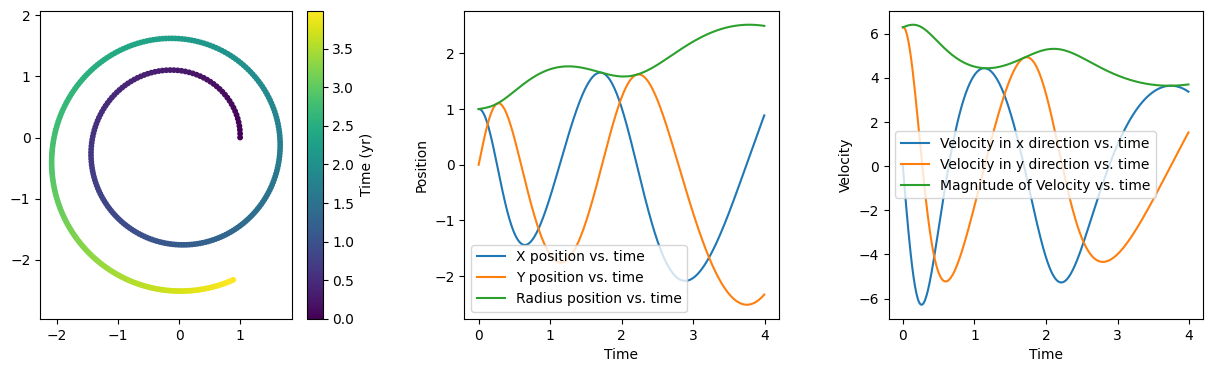

In [ ]:
x0 = 1 # initial x position in AU
y0 = 0 # initial y position in AU
v0x =0  # initial x velocity in AU/yr
v0y = 2*np.pi # initial y velocity in AU/yr
tmax = 4# time in years
dt = 0.01# time step in years


# call main
main = main(x0,y0,v0x,v0y,tmax,dt,False)

### Question 4

* does orbit stay stable when using the Euler method?  

The orbit does not stay stable

* describe what happens to the radius and speed over time.  What does this imply about the total energy of our Earth-Sun model?

The radius gradually gets greater and greater as velocity is getting lesser and lesser. The energy stays the same thorughout the Earth-Sun Model
* are your results consistent with what we observed when using the Euler method to model the simple harmonic motion of a mass on a spring?

My results are consistent with when we observed the Euler method in simple harmonic motion other than the gravitational pull affecting the graphs

* is the Euler method appropriate to use when modeling planetary motion?

The Euler Method is no appropraite to use because it cannot compute the correct orbit of the planet's motion.

# Adapt your model

(5 points)

Use your code to model the motion of another planet, or of a comet.

| Planet | Orbital Radius (AU) |
|-------|---------|
| Venus | 0.72 |
| Mars | 1.52 |
| Jupiter | 5.20 |
| Saturn | 9.54 |
| Uranus | 19.19 |
| Neptune | 30.06 |

In [ ]:
def make_plots(time, x,y,vx,vy):
  plt.figure(figsize=(15,4))
  plt.subplots_adjust(wspace=.35)

  plt.subplot(1,3,1)
  plt.scatter(x,y,c=time,s=10)
  plt.colorbar(label="Time (yr)")
  plt.axis('equal')

  plt.subplot(1,3,2)
  r = np.zeros(len(np.sqrt(x**2+y**2)))+30.06
  plt.plot(time,x, label = 'X position vs. time')
  plt.plot(time,y, label = 'Y position vs. time')
  plt.plot(time,r, label = 'Radius position vs. time')
  plt.xlabel("Time")
  plt.ylabel("Position")
  plt.legend()

  plt.subplot(1,3,3)
  v = np.sqrt(vx**2+vy**2)
  plt.plot(time,vx, label = 'Velocity in x direction vs. time')
  plt.plot(time,vy, label = 'Velocity in y direction vs. time')
  plt.plot(time,v, label = 'Magnitude of Velocity vs. time')
  plt.xlabel("Time")
  plt.ylabel("Velocity")
  plt.legend()


In [ ]:
def main(x0,y0,v0x,v0y,tmax,dt,cromer = True):
  '''Calling initialize function'''
  timeArr , xArr, yArr,vxArr,vyArr = initialize(x0,y0,v0x,v0y,tmax,dt)
  ''' Calling Calculate Function '''
  t, x , y , vx , vy = calculate(timeArr,xArr,yArr,vxArr,vyArr,dt, cromer = cromer)
  ''' Calling the make_plots function'''
  make_plots(t, x,y,vx,vy)

  return t, x, y, vx, vy

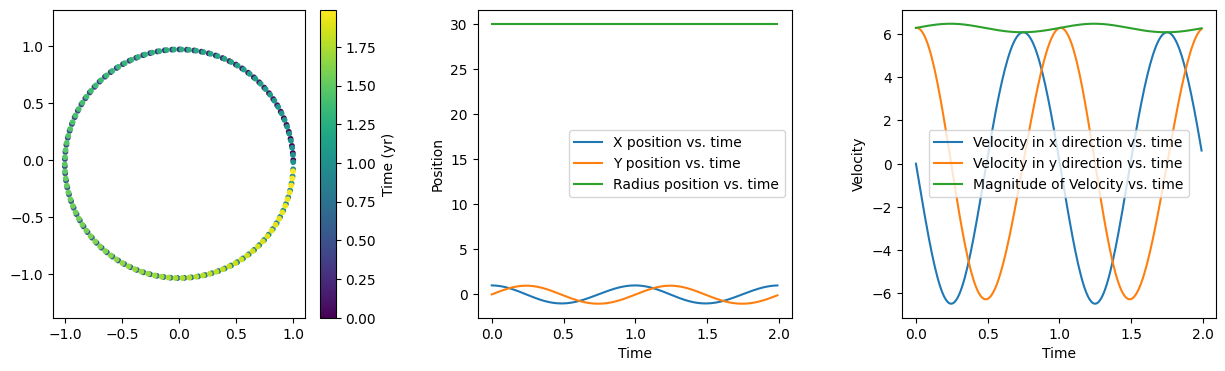

In [ ]:
x0 = 1 # initial x position in AU
y0 = 0 # initial y position in AU
v0x =0  # initial x velocity in AU/yr
v0y = 2*np.pi # initial y velocity in AU/yr
tmax = 2# time in years
dt = 0.01# time step in years


# call main
main = main(x0,y0,v0x,v0y,tmax,dt,True)